In [42]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

# We will load the users data in a DataFrame of its own

In [5]:
users_path = 'data/movielens/users.dat'
users = pd.read_csv(users_path, sep='::', names=['user_id', 'gender', 'agegroup', 'occupation', 'zipcode'])
users

<ipython-input-5-f80650bd3caa>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users = pd.read_csv(users_path, sep='::', names=['user_id', 'gender', 'agegroup', 'occupation', 'zipcode'])


,user_id,gender,agegroup,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


# We will load the movies data in a DataFrame of its own

In [8]:
movies_path = 'data/movielens/movies.dat'
movies = pd.read_csv(movies_path, sep='::', names=['movie_id', 'title', 'genres'])
movies

<ipython-input-8-9724b874f04e>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies = pd.read_csv(movies_path, sep='::', names=['movie_id', 'title', 'genres'])


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


# We will load the ratings data in a DataFrame of its own

In [11]:
ratings_path = 'data/movielens/ratings.dat'
ratings = pd.read_csv(ratings_path, sep='::', names=['user_id', 'movie_id', 'ratings', 'timestamp'])
ratings

<ipython-input-11-1d7018e7980f>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_csv(ratings_path, sep='::', names=['user_id', 'movie_id', 'ratings', 'timestamp'])


,user_id,movie_id,ratings,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


# Merge (ratings => movies) => users

In [12]:
d1 = pd.merge(pd.merge(ratings, movies), users)
d1

,user_id,movie_id,ratings,timestamp,title,genres,gender,agegroup,occupation,zipcode
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,4211,3791,2,965319075,Footloose (1984),Drama,M,45,5,77662
1000205,4211,3806,3,965319138,MacKenna's Gold (1969),Western,M,45,5,77662
1000206,4211,3840,4,965319197,Pumpkinhead (1988),Horror,M,45,5,77662
1000207,4211,3766,2,965319138,Missing in Action (1984),Action|War,M,45,5,77662


# Popular movies => that have more than 500 ppl who rated for it

In [15]:
d2 = d1['title'].value_counts()
d2

American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
                                                         ... 
Another Man's Poison (1952)                                 1
Schlafes Bruder (Brother of Sleep) (1995)                   1
Night Tide (1961)                                           1
Eden (1997)                                                 1
For Ever Mozart (1996)                                      1
Name: title, Length: 3706, dtype: int64

In [17]:
d3 = d2.loc[d2 > 500]
d3

American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
                                                         ... 
Alien Nation (1988)                                       504
Body Heat (1981)                                          504
Guns of Navarone, The (1961)                              502
Emma (1996)                                               501
Postino, Il (The Postman) (1994)                          501
Name: title, Length: 617, dtype: int64

In [18]:
popular_film_names = d3.index
popular_film_names

Index(['American Beauty (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Star Wars: Episode VI - Return of the Jedi (1983)',
       'Jurassic Park (1993)', 'Saving Private Ryan (1998)',
       'Terminator 2: Judgment Day (1991)', 'Matrix, The (1999)',
       'Back to the Future (1985)', 'Silence of the Lambs, The (1991)',
       ...
       'Ice Storm, The (1997)', 'Ordinary People (1980)', 'Halloween (1978)',
       'Peggy Sue Got Married (1986)', '28 Days (2000)', 'Alien Nation (1988)',
       'Body Heat (1981)', 'Guns of Navarone, The (1961)', 'Emma (1996)',
       'Postino, Il (The Postman) (1994)'],
      dtype='object', length=617)

# Top 10 movies that were loved by females

In [19]:
d4 = d1[['title', 'gender', 'ratings']]
d4

,title,gender,ratings
0,One Flew Over the Cuckoo's Nest (1975),F,5
1,James and the Giant Peach (1996),F,3
2,My Fair Lady (1964),F,3
3,Erin Brockovich (2000),F,4
4,"Bug's Life, A (1998)",F,5
...,...,...,...
1000204,Footloose (1984),M,2
1000205,MacKenna's Gold (1969),M,3
1000206,Pumpkinhead (1988),M,4
1000207,Missing in Action (1984),M,2


In [23]:
d4.index = d4['title'].values
del d4['title']
d4

,gender,ratings
One Flew Over the Cuckoo's Nest (1975),F,5
James and the Giant Peach (1996),F,3
My Fair Lady (1964),F,3
Erin Brockovich (2000),F,4
"Bug's Life, A (1998)",F,5
...,...,...
Footloose (1984),M,2
MacKenna's Gold (1969),M,3
Pumpkinhead (1988),M,4
Missing in Action (1984),M,2


# From d4, will filter out all the non popular films

In [24]:
d5 = d4.loc[popular_film_names]
d5

,gender,ratings
American Beauty (1999),M,4
American Beauty (1999),M,4
American Beauty (1999),M,5
American Beauty (1999),F,5
American Beauty (1999),M,5
...,...,...
"Postino, Il (The Postman) (1994)",F,5
"Postino, Il (The Postman) (1994)",F,5
"Postino, Il (The Postman) (1994)",F,4
"Postino, Il (The Postman) (1994)",F,4


In [26]:
d5['title'] = d5.index
d5

,gender,ratings,title
American Beauty (1999),M,4,American Beauty (1999)
American Beauty (1999),M,4,American Beauty (1999)
American Beauty (1999),M,5,American Beauty (1999)
American Beauty (1999),F,5,American Beauty (1999)
American Beauty (1999),M,5,American Beauty (1999)
...,...,...,...
"Postino, Il (The Postman) (1994)",F,5,"Postino, Il (The Postman) (1994)"
"Postino, Il (The Postman) (1994)",F,5,"Postino, Il (The Postman) (1994)"
"Postino, Il (The Postman) (1994)",F,4,"Postino, Il (The Postman) (1994)"
"Postino, Il (The Postman) (1994)",F,4,"Postino, Il (The Postman) (1994)"


# Generating a table where along rows we have unique movies, along columns we have unique genders, and row data consists of the average of ratings

In [27]:
d6 = d5.pivot_table('ratings', aggfunc='mean', index='title', columns=['gender'])
d6

gender,F,M
title,,
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
12 Angry Men (1957),4.184397,4.328421
"13th Warrior, The (1999)",3.112000,3.168000
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205
...,...,...
"X-Files: Fight the Future, The (1998)",3.489474,3.493797
X-Men (2000),3.682310,3.851702
You've Got Mail (1998),3.542424,3.275591


# Top 10 films that we loved by females

In [31]:
d7 = d6.sort_values(by='F', ascending=False)
top_10_females = d7.head(10)
top_10_females

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
To Kill a Mockingbird (1962),4.536667,4.372611
"Usual Suspects, The (1995)",4.513317,4.518248
Rear Window (1954),4.484536,4.472991
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Sixth Sense, The (1999)",4.477410,4.379944


# Top 10 films that were loved by males

In [33]:
d8 = d6.sort_values(by='M', ascending=False)
d8.head(10)

gender,F,M
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
"Wrong Trousers, The (1993)",4.588235,4.478261
"Close Shave, A (1995)",4.644444,4.473795


# Top 10 films that had the maximum disagreement factor between the genders

In [37]:
d6['diff'] = d6['F'] - d6['M']
d6['diff'] = d6['diff'].abs()
d6

gender,F,M,diff
title,,,
10 Things I Hate About You (1999),3.646552,3.311966,0.334586
101 Dalmatians (1961),3.791444,3.500000,0.291444
12 Angry Men (1957),4.184397,4.328421,0.144024
"13th Warrior, The (1999)",3.112000,3.168000,0.056000
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205,0.039102
...,...,...,...
"X-Files: Fight the Future, The (1998)",3.489474,3.493797,0.004323
X-Men (2000),3.682310,3.851702,0.169391
You've Got Mail (1998),3.542424,3.275591,0.266834


In [39]:
d7 = d6.sort_values(by='diff', ascending=False)
d8 = d7.head(10)
d8

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,0.830782
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
Dumb & Dumber (1994),2.697987,3.336595,0.638608
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
Grease (1978),3.975265,3.367041,0.608224
Caddyshack (1980),3.396135,3.969737,0.573602
Animal House (1978),3.628906,4.167192,0.538286
"Exorcist, The (1973)",3.537634,4.067239,0.529605
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,0.512885


In [40]:
d9 = d8[['F', 'M']]
d9

gender,F,M
title,,
Dirty Dancing (1987),3.790378,2.959596
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300
Dumb & Dumber (1994),2.697987,3.336595
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283
Grease (1978),3.975265,3.367041
Caddyshack (1980),3.396135,3.969737
Animal House (1978),3.628906,4.167192
"Exorcist, The (1973)",3.537634,4.067239
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131


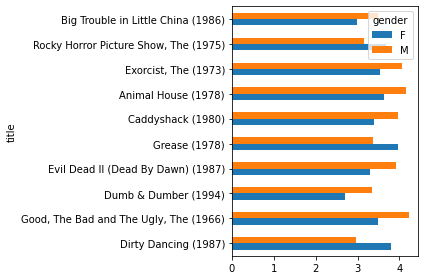

In [46]:
d9.plot(kind='barh')
plt.tight_layout()
plt.savefig('data/diagreement_analysis.pdf', format='pdf')